
# Programming Assignment 2

In this assignment, you will:

1. Practice writing code to train and evaluate models using both the two-way holdout method, and an evaluation approach appropriate for models with hyperparameters that uses k-fold cross validation plus a test set.

2. Practice writing code to optimize a machine learning model. In particular, we will use gradient descent to optimize a logistic regression model.

3. **574 Only**: Perform optimization with a different algorithm (Newton-Raphson)

# Resources you can use to complete this assignment (a COMPLETE list)

**NOTE: You ARE allowed to use Google to find things that fit this list (i.e. it is often easy to google something like "plotly draw line graph" to find the right part of the plotly documentation).**

- Anything linked to in this article
- Anything linked to from the course web page
- Any materials from another online course taught at a university (**if you use this, you MUST provide a link to the exact document used**)
- Anything posted by Kenny, Navid, or Yincheng on Piazza



# Grading

For grading of code in Part 2, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python Assignment2-Student.ipynb
python Assignment2-Student.py
```

The PDF that comes along with this document has other details on the points awarded for each part.

As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 4 things:
- Your completed jupyter notebook.
- Your written report, answering all questions asked here (and copied in the assignment PDF)
- `part_1.1_results.csv`
- `part_1.4_results.csv`


# Part 1 - Predicting Review Scores on Pitchfork

For Part 1, we will be using data from [this paper](https://ojs.aaai.org/index.php/ICWSM/article/view/7355). The data is a collection of reviews from [Pitchfork](https://pitchfork.com/), a site that provides expert reviews of music album. The authors of this paper have also combined the data with a set of features from [Spotify’s API](https://developer.spotify.com/documentation/web-api/) that provide insight into the music itself, e.g. the "acousticness" of the song.  We will tackle a regression problem here, trying to predict the score of a review from several of the other columns in the dataset.

## Part 1.1 - Feature Engineering with Feature Subsets

In the first subsection of Part 1, we’re going to rely on our old friend linear regression. We’re going to look at how running linear regression with various subsets of our features impacts our ability to predict score.

In Part 1.1, your task is to write code below that trains a separate linear regression model for a number of different feature subsets.  Specifically:

- The list `feature_sets` below is a list of lists; each sublist is a different subset of features to build a model with. 
- All models should be trained on the dataset `part1_train.csv`. 
- For each of these trained models, you should evaluate the model’s predictions on the training dataset, as well as the provided test set, called `part1_test.csv`. The evaluation metric we will use is **root mean squared error**.  

Write out the result to a file called `part_1.1_results.csv` and submit this along with your assignment. The file should have the following columns:
- `feature_set` - a column describing the features of the model used. For feature sets with multiple features, combine them using an underscore (you can do this with the code `"_".join(feature_set)`)
- `training_rmse` - a column that gives the RMSE of a linear regression model trained on this feature set on the training data
- `test_rmse` - a column that gives the RMSE of a linear regression model trained on this feature set on the test data

In addition, please answer the following questions:
- **1.1.1** Which model had the best RMSE on the *training data*? 
- **1.1.2** Which model had the best RMSE on the *test data*? 
- **1.1.3** Which feature do you believe was the most important one? Why? *(Note: There is more than one perfectly acceptable way to answer this question)*
- **1.1.4** What can we say about the utility of the Spotify features based on these results?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1.2_fold0.csv to 1.2_fold0.csv
Saving 1.2_fold1.csv to 1.2_fold1.csv
Saving 1.2_fold2.csv to 1.2_fold2.csv
Saving 1.2_fold3.csv to 1.2_fold3.csv
Saving 1.2_fold4.csv to 1.2_fold4.csv
Saving part1_test.csv to part1_test.csv
Saving part1_train.csv to part1_train.csv


In [ ]:
feature_sets = [['artist'],
 ['reviewauthor'],
 ['releaseyear'],
 ['recordlabel'],
 ['genre'],
 ['danceability'],
 ['energy'],
 ['key'],
 ['loudness'],
 ['speechiness'],
 ['acousticness'],
 ['instrumentalness'],
 ['liveness'],
 ['valence'],
 ['tempo'],
 ['danceability','energy','key','loudness','speechiness','acousticness',
  'instrumentalness','liveness','valence','tempo'],
 ['artist', 'reviewauthor', 'releaseyear', 'recordlabel', 'genre'],
 ['artist', 'reviewauthor', 'releaseyear', 'recordlabel', 'genre', 'danceability', 
  'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
  'liveness', 'valence', 'tempo']]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")


model = LinearRegression()

# Convenience things for you, note that releaseyear is continuous but is not a Spotify API variable
CONTINUOUS_FEATURES = ['releaseyear', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
CATEGORICAL_FEATURES = ['artist', 'reviewauthor', 'recordlabel', 'genre']


# Read in the data
training_data = pd.read_csv("part1_train.csv")
test_data = pd.read_csv("part1_test.csv")

result_data = []
for feature_set in feature_sets:
    #feature_set = feature_sets[0]
    # Write your code for Part 1.1 here!
    info_dict = dict()
    if len(feature_set) == 1:
        info_dict["feature_set"] = feature_set[0]
    else:
        info_dict["feature_set"] = "_".join(feature_set) 

    X_train = training_data[feature_set]
    y_train = np.log2(training_data['score'] + 1)
    P_CONTINUOUS_FEATURES = []
    P_CATEGORICAL_FEATURES = []
    for feature in feature_set:
        if feature in CONTINUOUS_FEATURES:
            P_CONTINUOUS_FEATURES.append(feature)
        if feature in CATEGORICAL_FEATURES:
            P_CATEGORICAL_FEATURES.append(feature)
    
    basic_pipeline = make_pipeline(
            ColumnTransformer([('numerical', StandardScaler(), P_CONTINUOUS_FEATURES),
                               ("categorical", OneHotEncoder(handle_unknown = 'ignore'),
                                P_CATEGORICAL_FEATURES)]),
            LinearRegression()
        )
    basic_pipeline.fit(X_train, y_train)
    predictions = basic_pipeline.predict(X_train)
    info_dict["training_rmse"] = mean_squared_error(y_train, predictions, squared=False)
    X_test = test_data[feature_set]
    y_test = np.log2(test_data['score'] + 1)
    # basic_pipeline.fit(X_test, y_test)
    predictions = basic_pipeline.predict(X_test)
    info_dict["test_rmse"] = mean_squared_error(y_test, predictions, squared=False)
    # info_dict["coef_"]=np.max(basic_pipeline.named_steps['linearregression'].coef_)
    result_data.append(info_dict)

csv_data = pd.DataFrame(result_data).to_csv('part1.1_results.csv')
df = pd.read_csv('part1.1_results.csv')
pd.set_option('display.max_colwidth', None)
df
# print(df['training_rmse'].min())
# print(df['test_rmse'].min())

,Unnamed: 0,feature_set,training_rmse,test_rmse
0,0,artist,0.266125,0.280654
1,1,reviewauthor,0.256951,0.270757
2,2,releaseyear,0.268724,0.278764
3,3,recordlabel,0.260726,0.277384
4,4,genre,0.267662,0.277911
5,5,danceability,0.268648,0.279062
6,6,energy,0.268691,0.278811
7,7,key,0.269219,0.279693
8,8,loudness,0.268019,0.278412
9,9,speechiness,0.269224,0.279639


## Part 1.2 - Feature Engineering with the LASSO

In Part 1.2, your task is to write code below that trains an L1-regularized linear regression model, with an expanded feature set.  Specifically:

1. Begin with the final feature set listed in `feature_sets` (i.e. your feature set, to begin this section, is `feature_sets[-1]`.
2. One-hot encode your categorical variables, setting `drop=if_binary` and `sparse=False` in the function arguments. 
3. Scale all of your continuous features using the `StandardScaler`.
4. Train an L1-regularized linear regression model using these features on the dataset `part1_train.csv`. You should use the [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) class in `sklearn`, it will do the cross-validation necessary to select the appropriate value for the regularizer for you!  Use 10-fold cross-validation to perform model selection (set the `LassoCV` parmaeter `cv` to 10), and set the `random_state` to 1. Do not change any of the other parameters to `LassoCV` (i.e. leave them at their defaults).
5. Identify the best `alpha` value (the regularizer term, according to `sklearn`. In class, we refer to this as $\lambda$!) in terms of average mean squared error according to the cross-validation.
6. Finally, train a [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model on the entire training dataset (`part1_train.csv`). You will use this to report the root mean squared error on the test set (Question 1.2.4 below), and use it in Part 1.3 below as well.

**Hint: The proceedure outlined above is very similar to ones we have discussed in class and shown how to do using `Pipeline`s.** 


In [ ]:
# Write your code for Part 1.2 here
from sklearn.linear_model import LassoCV, Lasso
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer

# Read in the data
training_data = pd.read_csv("part1_train.csv")
test_data = pd.read_csv("part1_test.csv")
features = feature_sets[-1]

#targets
y_train = np.log2(training_data['score'] + 1)
y_test = np.log2(test_data['score'] + 1)

basic_pipeline = make_pipeline(
        ColumnTransformer([('numerical', StandardScaler(), CONTINUOUS_FEATURES),
                           ("categorical", OneHotEncoder(drop='if_binary', sparse=False), CATEGORICAL_FEATURES)]),
    )

# Do the CV to find alpha
lassocv_pipe = Pipeline([("pipe",basic_pipeline), ("model", LassoCV(cv=10, random_state=1))])
lassocv_pipe.fit(training_data[features], y_train)
y_pred_train = lassocv_pipe.predict(training_data[features])
training_rmse = mean_squared_error(y_train, y_pred_train,squared=False)
y_pred_test = lassocv_pipe.predict(test_data[features])
test_rmse = mean_squared_error(y_test, y_pred_test,squared=False)

best_alpha = lassocv_pipe.named_steps['model'].alpha_
print('number of features introduced by one hot: ', len(lassocv_pipe.named_steps["pipe"].named_steps['columntransformer'].named_transformers_['categorical'].get_feature_names_out()))
#print('number of features: ',lassocv_pipe.named_steps["model"].n_features_in_)
#print('average_rmse_training: ',training_rmse)
#print('test_rmse: ',test_rmse)
print('best_alpha: ', best_alpha)

# Retrain the model
lasso_pipe = Pipeline([("pipe", basic_pipeline), ("model", Lasso(alpha=best_alpha))])
lasso_pipe.fit(training_data, y_train)
y_pred_train = lasso_pipe.predict(training_data)
training_rmse = mean_squared_error(y_train,y_pred_train,squared=False)
y_pred_test = lasso_pipe.predict(test_data)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('training_rmse:', training_rmse, 'test_rmse:', test_rmse)


number of features introduced by one hot:  680
best_alpha:  3.87224703978818e-05
training_rmse: 0.24625592947243133 test_rmse: 0.2662673832867446


Now, answer the following questions:
- **1.2.1** - How many total features are introduced by Step 2 above? Provide both the number and an explanation of how you got to this number.
- **1.2.2** - What was the best `alpha` value according to your cross-validation results?
- **1.2.3** - What was the **average RMSE** of the model with this `alpha` value on the k-fold cross validation on the *training* data?
- **1.2.4** - What was the **RMSE** of the model with this `alpha` value on the k-fold cross validation on the *test* data?


# Part 1.3 - Interpreting Model Coefficents

In this section we will interpret the coefficients from the final model you trained on all of the training data.

- **1.3.1** - How many non-zero coefficients are in this final model?
- **1.3.2** - What percentage of the coefficients are non-zero in this final model?
- **1.3.3** - Who were the three most critical review authors, as estimated by the model? How do you know?
- **1.3.4** - Who were the three artists that reviewers tended to like the most?  How do you know?
- **1.3.5** - What genre did Pitchfork reviewers tend to like the most? Which genre did they like the least?


In [ ]:
# Code for 1.3 here
model = lasso_pipe.named_steps['model']
# 1.3.1
print('number of non-zero elements: ',np.nonzero(model.coef_)[0].size)
# 1.3.2
print('percentage of non-zero elements: ',np.nonzero(model.coef_)[0].size/model.coef_.size*100)
# 1.3.3
print((pd.concat([training_data['reviewauthor'],pd.DataFrame(np.power(2,y_pred_test)-1,columns=['score'])], axis=1).groupby('reviewauthor').sum()).sort_values(by=['score'],ascending=False)[1:4])
# 1.3.4
print((pd.concat([training_data['artist'],pd.DataFrame(np.power(2,y_pred_test)-1,columns=['score'])], axis=1).groupby('artist').sum()).sort_values(by=['score'],ascending=False)[1:4])
# 1.3.5
print((pd.concat([training_data['genre'],pd.DataFrame(np.power(2,y_pred_test)-1,columns=['score'])], axis=1).groupby('genre').sum()).sort_values(by=['score'],ascending=False)[1:2])
print((pd.concat([training_data['genre'],pd.DataFrame(np.power(2,y_pred_test)-1,columns=['score'])], axis=1).groupby('genre').sum()).sort_values(by=['score'],ascending=False)[-2:-1])

number of non-zero elements:  468
percentage of non-zero elements:  67.72793053545585
                      score
reviewauthor               
Ian Cohen        519.113269
Joe Tangari      429.021448
Mark Richardson  379.339351
                 score
artist                
Mogwai       33.028070
Xiu Xiu      29.092634
Mount Eerie  22.273269
                  score
genre                  
Electronic  2598.473454
             score
genre             
Global  145.860875


# Part 1.4 - "Manual" Cross-Validation + Holdout for Model Selection and Evaluation

We will finally use cross validation for both algorithm and model selection, with a hold-out test set for a final evaluation. We will use **5-fold cross validation** to identify the best parameters and hyperparameters for a set of models. We will then take our final models and use a final hold-out test set (the same one as above) to estimate the generalization error of the models.

Specifically, your task is first to write code that trains and evaluates the following models, one for each of the specified hyper parameters sets:

- `Decision Tree regression` - All combinations of a `max_depth` of 5, 10, or 20, and a `criterion` of `"squared error"` or `"absolute error"`. Use the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).
- Ridge regression - Use the following choices of L2 penalty: $[10^{-5}, 10^{-4}, ..., 10^4, 10^5]$. In Python, you can create a list of these numbers using `np.logspace(-5, 5, 11)`. Use the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class from sklearn to train a Ridge Regression model. The parameters you need to pass when constructing the Ridge model are `alpha`, which lets you specify what you want the L2 penalty to be, and `random_state=0` to avoid randomness.
- kNN regression - Values of `n_neighbors` of 1, 5, 10, and 15. Use the [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) class.

Additional notes:
1. All models should use the feature sets described in Part 1.3 (the same ...one-hot encoded... categorical variables, and the scaled continuous variables)
2. As opposed to using the `KFold` class from `sklearn` like we did in class, we have instead provided you with pre-existing data sets; you should therefore use the pre-split data in the provided CSV files ``1.2_fold0.csv ... 1.2_fold4.csv``

**What to submit**:

1. Write out the result to a file called `part_1.4_results.csv` and submit this along with your assignment. The file should have the following columns:
- `model_name` - The name of the model, one of `DTR` (Decision Tree Regression), `Ridge`, or `KNN`.
- `hyperparameter_setting` - a column describing the hyperparameters of the model. For models with multiple hyperparameters, combine them using an underscore (you can do this with the code `"_".join(hyperparameters)`).
- `mean_training_rmse` - a column that gives the mean RMSE on the k-fold training data. You should take the average of the model’s errors on the different folds, using root mean squared error again as your evaluation metric.
- `sd_training_rmse` - a column that gives the standard deviation RMSE on the k-fold training data.
- `test_rmse` - a column that gives the RMSE of a linear regression model trained on this feature set on the test data


2. Answer the following questions:
- **1.4.1** Report, for each model, the hyper parameter setting that resulted in the best performance
- **1.4.2** Which model performed the best overall on the cross-validation? 
- **1.4.3** Which model performed the best overall on the final test set? 
- **1.4.4** With respect to your answer for 1.4.3, why do you think that might be? (*Note: there is more than one correct way to answer this question*)
- **1.4.5** Which model/hyperparameter setting had the highest standard deviation across the different folds of the cross validation?
- **1.4.6** With respect to your answer for 1.4.6, why do you think that might be? (*Note: there is more than one correct way to answer this question*)

In [ ]:
from numpy.lib.function_base import average
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

def get_metrics(X_train,y_train,X_test,y_test,pipeline):
  pipeline.fit(X_train,y_train)
  y_pred_train=pipeline.predict(X_train)
  train_error=mean_squared_error(y_train,y_pred_train,squared=False)
  y_pred_test=pipeline.predict(X_test)
  test_error=mean_squared_error(y_test,y_pred_test,squared=False)
  return train_error,test_error

def get_model(model_name,hyperparameter_setting):
  if model_name=='DTR':
    return '_'.join(hyperparameter_setting),DecisionTreeRegressor(criterion=hyperparameter_setting[1],max_depth=int(hyperparameter_setting[0]))
  elif model_name=='Ridge':
    return hyperparameter_setting,Ridge(alpha=hyperparameter_setting)
  return hyperparameter_setting,KNeighborsRegressor(n_neighbors=hyperparameter_setting)


def prepare_dict(model_name,hyperparameter_setting,basic_pipeline):
  info_dict={}
  info_dict['model_name']=model_name
  info_dict['hyperparameter_setting'],model=get_model(model_name,hyperparameter_setting)
  info_dict['training_rmse_kfolds']=[0,0,0,0,0]
  info_dict['test_rmse_kfolds']=[0,0,0,0,0]
  info_dict['pipeline']=Pipeline([('pipe',basic_pipeline),('model',model)])
  return info_dict

features = feature_sets[-1]
list_of_info_dict=[]
basic_pipeline = make_pipeline(
      ColumnTransformer([('numerical', StandardScaler(), CONTINUOUS_FEATURES),
                           ("categorical", OneHotEncoder(drop='if_binary',sparse=False,handle_unknown='ignore'),CATEGORICAL_FEATURES)]),
    )

for param in [('5','squared_error'),('10','squared_error'),('20','squared_error'),('5','absolute_error'),('10','absolute_error'),('20','absolute_error')]:
  list_of_info_dict.append(prepare_dict('DTR',param,basic_pipeline))
for param in np.logspace(-5,5,11):
  list_of_info_dict.append(prepare_dict('Ridge',param,basic_pipeline))
for param in [1,5,10,15]:
  list_of_info_dict.append(prepare_dict('KNN',param,basic_pipeline)) 

train_list=[]
test_list=[]
for i in range(5):
  data=pd.read_csv('1.2_fold'+str(i)+'.csv')
  training_data,test_data=train_test_split(data,test_size=0.2,random_state=1)
  training_data=pd.DataFrame(training_data)
  test_data=pd.DataFrame(test_data)
  train_list.append((training_data[feature_sets[-1]],np.log2(training_data['score'] + 1)))
  test_list.append((test_data[feature_sets[-1]],np.log2(test_data['score'] + 1)))

for info in list_of_info_dict:
  i=0
  for (X_train,y_train),(X_test,y_test) in zip(train_list,test_list):
    info['training_rmse_kfolds'][i],info['test_rmse_kfolds'][i]=get_metrics(X_train,y_train,X_test,y_test,info['pipeline'])
    i+=1
  info['mean_training_rmse']=np.mean(info['test_rmse_kfolds'])
  info['sd_training_rmse']=np.std(info['test_rmse_kfolds'])
    
# final part train and test using all of the data
training_data = pd.read_csv("part1_train.csv")
test_data = pd.read_csv("part1_test.csv")
y_train = np.log2(training_data['score'] + 1)
y_test = np.log2(test_data['score'] + 1)
for info in list_of_info_dict:
  _,info['test_rmse']=get_metrics(training_data[features],y_train,test_data[features],y_test,info['pipeline'])

#prepare the results and save them to a csv file
columns=['model_name','hyperparameter_setting','mean_training_rmse','sd_training_rmse','test_rmse']
csv_data = pd.DataFrame(list_of_info_dict,columns=columns).to_csv('part_1.4_results.csv')
df = pd.read_csv('part_1.4_results.csv')

# Part 2

In class, we have shifted from regression to classification. Here, we're going to get a little practice in optimizing one of the classification models we saw in class - logistic regression. As a reminder...

The loss function of logistic regression (also known as the logistic-loss or log-loss) is given by:
\begin{equation}
  J({\bf w}) = \frac{1}{n}\sum_{i=1}^n \log{(1 + \exp{(-y_i{\bf w}^\top{\bf x}_i}))}
  \label{eqn:logloss}
\end{equation}

The gradient for this loss function, as derived in class, is:
\begin{equation}
  \nabla J({\bf w}) = -\frac{1}{n}\sum_{i=1}^n \frac{y_i}{1 + \exp{(y_i{\bf w}^\top{\bf x}_i)}}{\bf x}_i
  \label{eqn:loglossgradient}
\end{equation}


The Hessian for the loss function is given by:
\begin{equation}
  {\bf H}({\bf w}) = \frac{1}{n} \sum_{i=1}^n \frac{\exp{(y_i{\bf w}^\top{\bf x}_i)}}{(1 + \exp{(y_i{\bf w}^\top{\bf x}_i)})^2}{\bf x}_i{\bf x}_i^\top
  \label{eqn:loglosshessian}
\end{equation}

## Part 2.1 - Logistic Regression with Gradient Descent

In Part 2.1 we will implement logistic regression with gradient descent. You need to finish implementing 3 functions:

1. `logistic_objective` - compute the logistic loss for the given data set (see equation above)
2. `logistic_gradient` - compute the gradient vector of logistic loss for the given data set (see equation above)
3. `run_gradient_descent` - run the gradient descent algorithm, given these two functions.

We have provided you with some simulation data to evaluate your method with. Part 2.1 will, however, largely be graded by evaluating your code on a slightly different dataset to ensure robustness. 

In addition, please submit answers to the following questions on your written report:

- **2.1.1** - How did you go about selecting a good step size, i.e. one that was not too big or too small? (*Note: There is more than one correct answer to this*)
- **2.1.2** - What is the condition under which we assume that the gradient descent algorithm has converged in the code here?
- **2.1.3** - What is a different convergence metric we could have used? (*Note: There is more than one correct answer to this*)

In [ ]:
def logistic_objective(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    if len(w.shape)==1:
      w=w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #error = np.mean(np.log(1 + np.exp((-y)).dot(np.transpose(w)).dot(np.transpose(X))))
    error = np.mean(np.log(1+np.exp(-1*y*(X.dot(w)))))
    # error = (1 / n) * np.sum(np.log(1 + np.exp(-y * (np.transpose(w)) * X)))
    return error

def logistic_gradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #val = y / (1 + np.exp(y.dot(np.transpose(w)).dot(np.transpose(X))))
    if len(w.shape)==1:
      w=w[:,np.newaxis]
    '''print("y:", y.shape)
    print("w:", w.shape)
    print("X:", X.shape)'''
    denominator = np.squeeze(np.log(1+np.exp(y*(X.dot(w)))+0.0001))
    numerator = np.squeeze(y)*np.transpose(X)
    #print(numerator.shape)
    #print(denominator.shape)
    
    gradient=numerator/denominator
    #print(gradient)
    gradient=np.squeeze(-1*np.mean(gradient,axis=1))
    #val = val.dot(X)
    #print("gradient:",gradient)
    #gradient = (-1 / n) * np.sum(val)
    # gradient = (-1 / n) * np.sum(np.transpose(X).dot(y) / (1 + np.exp(y.dot(np.transpose(w)).dot(np.transpose(X)))))
    return gradient

def run_gradient_descent(X, y):
    old_w = -1*np.ones(shape=(X.shape[1],1)) # set the initial weights to -1
    # change this value! This is an unreasonable step size
    step_size = 0.000045
    new_w = old_w
    y = y.reshape(len(y), 1)
    mx = 1000
    iter = 0
    
    while ((new_w - old_w)**2).sum() > .0000000001 or iter==0:
        #IMPLEMENT THIS!

        if mx == iter:
          break

        old_w = new_w
        gradient = logistic_gradient(old_w, X, y)
        new_w=step_size * gradient
        #print(new_w)
        new_w = np.transpose(np.transpose(old_w) - new_w )
        #print("new_w",new_w.shape)
        print(logistic_objective(new_w, X, y))
        #print(iter, ((new_w - old_w)**2).sum())
        #print(gradient)
        
        iter = iter + 1

    return np.squeeze(new_w)


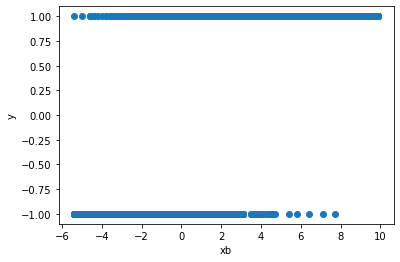

In [ ]:
from scipy.stats import uniform, bernoulli
import matplotlib.pyplot as plt
import functools
import numpy as np
draw_binary = functools.partial(np.random.binomial,n=1)

## Simulated data to test your method
DATA_SIZE = 10000
x1 = bernoulli(.5).rvs(DATA_SIZE)
x2 = np.floor(uniform(18,60).rvs(DATA_SIZE))
true_w = [-9, 3.5, 0.2]
xb = true_w[0] + true_w[1]*x1 + true_w[2]*x2
p = 1/(1 + np.exp(-xb))
y = np.array([1 if draw_binary(p=v) else -1 for v in p])

plt.figure()
plt.scatter(xb, y)
plt.xlabel('xb')
plt.ylabel('y')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# notice that logistic regression as implemented in sklearn does not get the exact results either!
# so you shouldn't worry if you're a bit off
X = np.hstack([np.ones((len(xb),1)), x1[:,np.newaxis], x2[:,np.newaxis]])

model = LogisticRegression(solver='liblinear', random_state=0,fit_intercept=False)
model.fit(X,y).coef_

array([[-8.44977713,  3.16937322,  0.18888692]])

In [ ]:
# this is how we will test your results

# w = d x 1
    # X = N x d
    # y = N x 1

'''print("y:", y.shape)
print("w:", w.shape)
print("X:", X.shape)'''

gd_result = run_gradient_descent(X,y)
print(gd_result)
# is your result relatively close to the truth?
np.abs(true_w-gd_result).sum()

inf
inf
70.79242641538345
27.732491793376305
58.87884708900829
inf
inf
65.64769943917027
22.58776804526578
78.70888897165166
inf
inf
60.50302554534789
17.443097923594298
98.53866912847727
inf
inf
55.358411326046685
12.298488170696134
118.36806793732741
inf
inf
50.21389106454708
7.153973469723645
137.6857118031605
inf
88.26122318456781
45.20128029438546
2.145813221393323
46.866115553757034
inf
inf
68.57232885855026
25.512395463828582
66.69631366322942
inf
inf
63.42762418542892
20.367694220319514
86.52625111589212
inf
inf
58.282972984800196
15.22304704739013
106.3559066877891
inf
inf
53.13838805346198
10.078466914309626
126.18209267950233
inf
inf
47.994695339226425
4.934802647231078
128.5583788016936
inf
inf
47.34878497732745
4.28895733869447
118.3089462276392
inf
inf
49.956977507835056
6.897060322880768
136.6763572816851
inf
88.24924711405876
45.18930413651058
2.1369496591988564
49.953181031370946
inf
inf
67.5048501360344
24.444917258300613
69.78332332081419
inf
inf
62.360155186051
19.3

42.46224409215248

## <span style="color:red"> 574 Only</span> Part 2.2 - Optimization with Newton-Raphson <span style="color:red"> 574 Only</span>

In Part 2.2, you are going to, instead of using gradient descent, use the Newton-Raphson method to optimize the same logistic regression model. To do so, you will need to 1) implement the `logistic_hessian` function to compute the Hessian matrix of logistic loss for the given data set, and 2) use `scipy`'s `optimize` function to perform the optimization, rather than writing a function by hand to do so.  

For Part 2.2, you will only need to implement these functions, we will test them using our own code. You can, however, perform the same kinds of tests that we proposed above to check your work! 

In [ ]:
def logistic_hessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    if len(w.shape)==1:
      w=w[:,np.newaxis]
    '''print("y:", y.shape)
    print("w:", w.shape)
    print("X:", X.shape)'''
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    exponent=np.exp(y*(X.dot(w)))
    hessian = np.squeeze(exponent/((1+exponent)**2))
    hessian= hessian*(np.transpose(X).dot(X)[:,:,np.newaxis])
    hessian=np.mean(hessian,axis=2)
    #print(hessian)
    return hessian

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

def run_newton_raphson(X,y):
    
    opts = {'maxiter' : 50}    # Preferred value.
    w_init = np.zeros((X.shape[1]))
    args = (X,y[:,np.newaxis])
    # note: this is *almost* what you need, you just need to figure out what arguments are necessary here!
    soln = minimize(logistic_objective,
                    w_init,
                    hess=logistic_hessian,
                    args=args,
                    jac=logistic_gradient,
                    method='Newton-CG',
                    options=opts)

    w = np.transpose(np.array(soln.x))
    w = w[:,np.newaxis]
    return w


In [ ]:
run_newton_raphson(X,y)

array([[-1.03804656],
       [ 0.34116913],
       [ 0.04096668]])